In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
from plot import df_insert_length, plot_category_distribution, plot_fbank, plot_fft, plot_mfccs, plot_signals
from calculations import calc_fft, calc_envelope_signal
from python_speech_features import logfbank, mfcc

## Extracting length of each `wavfile` for seeing category distribution

In [2]:
df = df_insert_length("instruments.csv", "wavfiles")
df.head()

,label,length
fname,,
5388d14d.wav,Saxophone,4.14
c685f05f.wav,Saxophone,1.54
36d20ab5.wav,Saxophone,4.90
d6665734.wav,Saxophone,10.50
7352e28f.wav,Saxophone,6.24


## Category Distribution

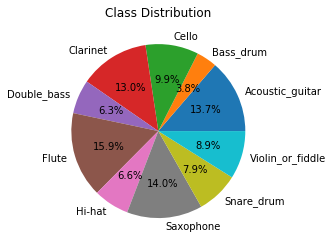

In [3]:
categories = list(np.unique(df.label))
categories_dist = df.groupby(["label"])["length"].mean()
plot_category_distribution(categories_dist)
plt.show()

## Time Domain / Time Series

## Preparing data to be visualized in various plots
- `signals`: Time series (Time Domain) visualization (Raw)
- `noise_reduce_signals`: Time series visualization with noise threshold filtering
- `fft`: Fourier Transform (Frequency Domain) visualization 
- `fbank`: Filter bank coefficient visualization
- `mfccs`: Mels Cepstrum coefficient visualization

In [4]:
signals = {}
noise_reduce_signals = {}
fft = {}
fbank = {}
mfccs = {}

for category in categories:
    wav = df[df.label == category].index[0]
    signal, sampling_rate = librosa.load(os.path.join("wavfiles", wav))
    
    noise_reduce_signals[category] = signal[calc_envelope_signal(signal, sampling_rate, 0.005)]
    signals[category] = signal
    fft[category] = calc_fft(signal, sampling_rate)
    
    fbank[category] = logfbank(
        signal[:sampling_rate], 
        samplerate=sampling_rate, 
        nfft=1103
    ).T # Take transpose for neater plotting

    mfccs[category] = mfcc(
        signal[:sampling_rate], 
        samplerate=sampling_rate,
        nfft=1103
    ).T

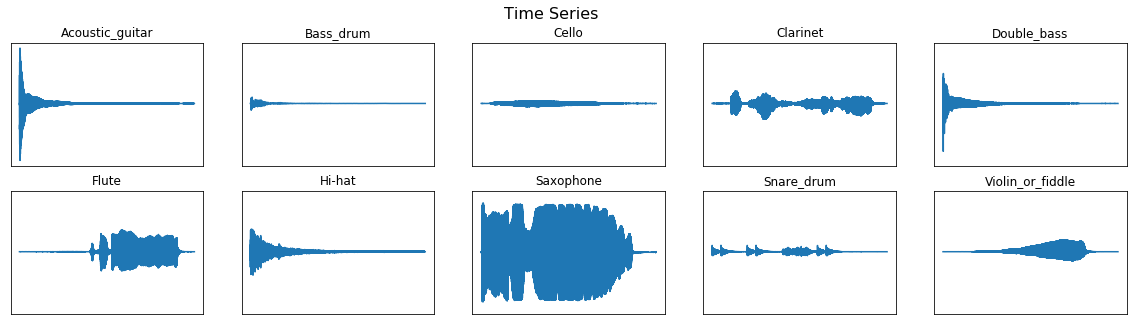

In [5]:
plot_signals(signals)
plt.show()

## Time Domain / Time Series with Noise Threshold Filtering

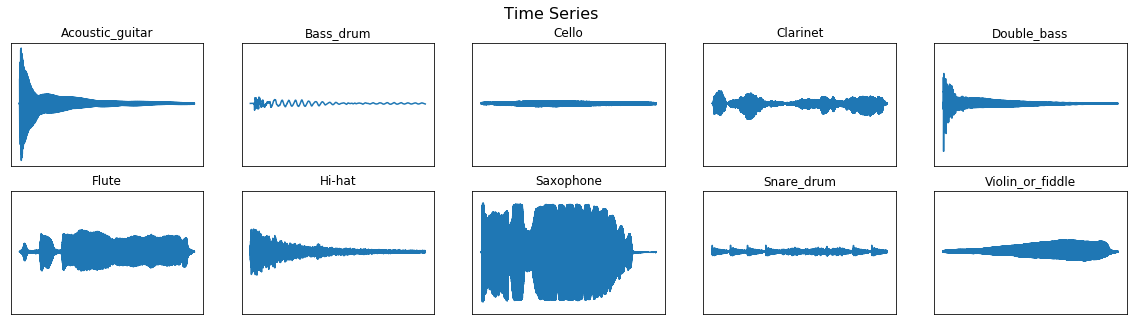

In [6]:
plot_signals(noise_reduce_signals)
plt.show()

## Fourier Transform (Frequency Domain)

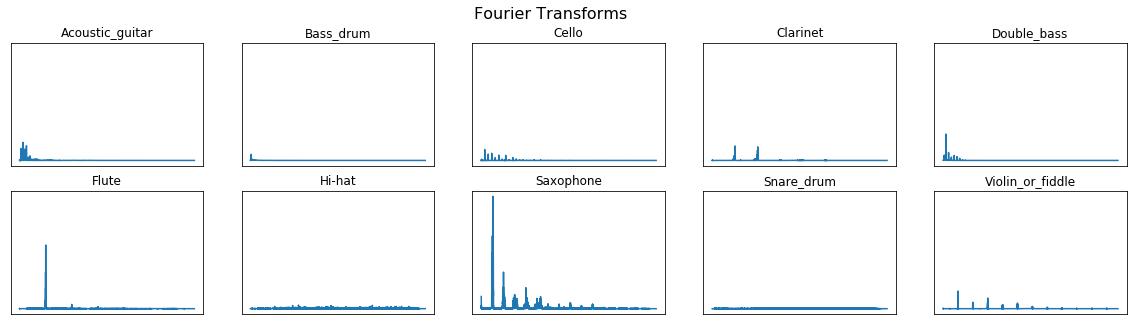

In [8]:
plot_fft(fft)
plt.show()

## Filter Bank Coefficient

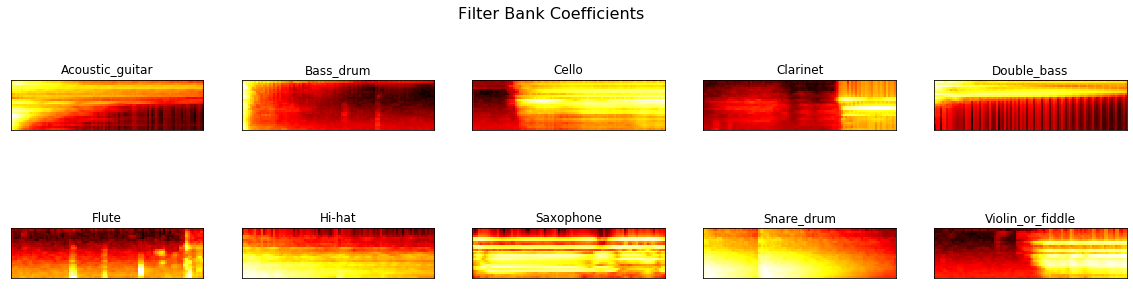

In [7]:
plot_fbank(fbank)
plt.show()

## Mels Cepstrum Coefficient

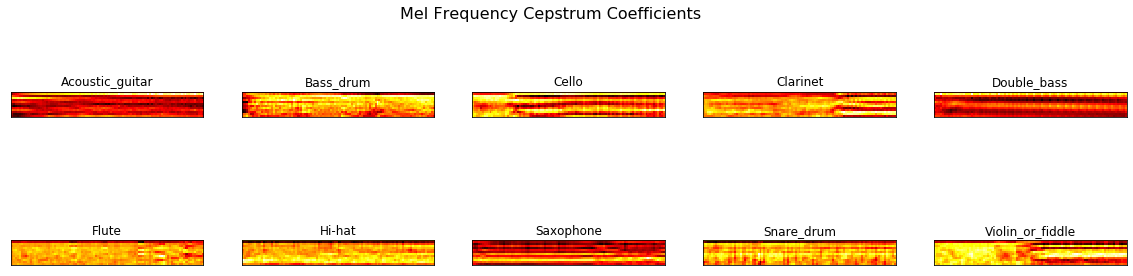

In [9]:
plot_mfccs(mfccs)
plt.show()

## Outputs clean data into `clean` directory for model preparation

In [10]:
if not os.listdir():
    for fname in tqdm(df.index):
        signal, sampling_rate = librosa.load(os.path.join("wavfiles", fname), sr=16000) # Downsampling
        wavfile.write(
            os.path.join("clean", fname), 
            sampling_rate, 
            signal[calc_envelope_signal(signal, sampling_rate, 0.005)]
        )

## Categories Distribution for Clean Data

In [14]:
df = df_insert_length("instruments.csv", "clean")
df.head()

,label,length
fname,,
5388d14d.wav,Saxophone,4.140000
c685f05f.wav,Saxophone,1.540000
36d20ab5.wav,Saxophone,4.309188
d6665734.wav,Saxophone,9.967250
7352e28f.wav,Saxophone,6.222188


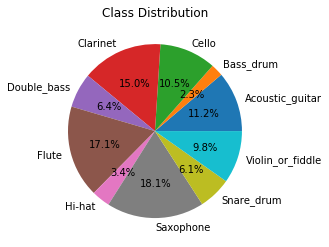

In [15]:
categories = list(np.unique(df.label))
categories_dist = df.groupby(["label"])["length"].mean()
plot_category_distribution(categories_dist)
plt.show()